# Tutorial: Universal approximation theorem

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.in2p3.fr%2Fenergy4climate%2Fpublic%2Feducation%2Fmachine_learning_for_climate_and_energy/master?filepath=book%2Fnotebooks%2F10_tutorial_neural_networks.ipynb)

Tutorial to the class [Neural Networks](10_neural_networks.ipynb).

## Objective

The objective of this tutorial is to design a simple network in order to understand the arhitecture of a neural network. Then we will focus on the hyperparameters of the network. Last we will work with the neural network implementation in scikit learn.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In the first part of this tutorial, we want to build a simple network with 1 input, 1 hidden layer with 3 neurons and 1 output. We want a sigmoid activation function for the hidden layer and a no activation function for the output neuron.

> ***Question***
>
> - Draw this network on paper. Think about all the arrays you are going to need

For now, let suppose we have only one observation `x` and one corresponding output `y = sin(x)`

In [2]:
x = 0.5
y = np.sin(2*x)

We write `N=3` the number of hidden neurons. Declare the arrays `w1`, `b1`, `w2` and `b2` for the weights and biases. Initialize these arrays with random values.

In [3]:
# your code here
N = 3

Write two functions:
- one for the sigmoid 
- and one for the derivative of the sigmoid

In [4]:
# your code here

Plot the sigmoid and its derivative it in the range [-10,10]

In [5]:
# your code here

### Hidden layer

> Write a function that computes the activation level in the hidden layer

In [6]:
# your code here

Write the `feedforward` function that computes the ouput layer as a function of the input layer `x`.

In [7]:
# your code here

Write the `cost` function that returns the cost function as a function of the input data `x` and output `y`

In [8]:
# your code here

What is the value of cost function of your network initialize with random weights and biases?

In [9]:
# your code here

### Gradient of the cost function

We want to optimize our network and to do so we need to change the weights and biases. As we saw in class, we need to compute the gradient of the cost function with respect to the weights and biases in order to march down the gradient of the cost function. For this simple network you may want to re-derive the expression of the gradient based on the forwarward propagation function.

On a piece of paper, derive

\begin{equation}
\frac{\partial C}{\partial \mathbf w_2}\quad \frac{\partial C}{\partial \mathbf b_2} \quad \frac{\partial C}{\partial \mathbf w_1}\quad \frac{\partial C}{\partial \mathbf b_1}
\end{equation}

you will see that as you move backward in the network, you can reuse the derivative of the layer above. Do you see why it is called the backpropagation algorithm?

Implement it in python.

In [10]:
# your code here

Choose a learning rate `eta` and increment your weights and biases by $-\eta \nabla C$

In [11]:
# your code here

Compute the new cost function. It should have gone down... There are many possibilities if that is not the case: first decrease the learning rate, then check all your functions.

In [12]:
# your code here

Add a loop to repeat the previous operation until you reach convergence. You will have to first define convergence.

In [13]:
# your code here

***Congratulations!!***

You have built your first neural network.

Study the properties of convergence: how many epoch do you need to reach convergence?
When you change the learning rate, how does it affect the convergence?

In [14]:
# your code here

### More samples

So far, we have only worked with one sample. It is actually a good news that we were able to fit a neural network on it. As you may have noticed in the begining of this tutorial, we had $y = \sin(2*x)$. So we are trying to guess this $\sin$ function. Below is the actual data

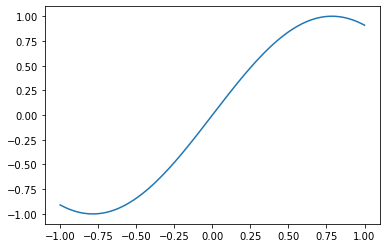

In [15]:
N_sample = 200
x = np.linspace(-1, 1, N_sample)[:, None]
y = np.sin(2*x)
plt.plot(x,y)

Below is an extension of the code you have just writen in order to compute the cost function and the gradient over all sample. The code is writen on purpose in a very compact form. 

> - Look at the code above and identify all the steps that we have described so far. 
> - Add comments in the code to describe what the code is doing
> - Change the code to define 3 hyper parameters: number of neurons in the hidden layer, learning rate and the number of epochs.


In [16]:
def tanh(x):
    return np.tanh(x)
def derivative_tanh(x):
    return 1 - tanh(x)**2
w1 = np.random.uniform(0, 1, (1, 10))
w2 = np.random.uniform(0, 1, (10, 1))
b1 = np.full((1, 10), 0.1)
b2 = np.full((1, 1), 0.1)
for i in range(5000):
    a1 = x
    z2 = a1.dot(w1) + b1
    a2 = tanh(z2)
    z3 = a2.dot(w2) + b2
    cost = np.sum((z3 - y)**2)/2
    z3_delta = z3 - y
    dw2 = a2.T.dot(z3_delta)
    db2 = np.sum(z3_delta, axis=0, keepdims=True)
    z2_delta = z3_delta.dot(w2.T) * derivative_tanh(z2)
    dw1 = x.T.dot(z2_delta)
    db1 = np.sum(z2_delta, axis=0, keepdims=True)
    for param, gradient in zip([w1, w2, b1, b2], [dw1, dw2, db1, db2]):
        param -= 0.0001 * gradient

In the same figure, plot the output as a function of input parameters 
- for the observations
- for the output of the network

In [17]:
# your code here

Modify the code above to get the cost function at each epoch and plot it

In [18]:
# your code here

What hyper parameter has the most impact to get an accurate reconstruction.

In [19]:
# your code here

### Neural network with scikit-learn

Scikit-learn has a built-in Neural network function

In [20]:
from sklearn.neural_network import MLPRegressor

Look at the documentation of the `MLPRegressor`. This class of model is extremely similar to what we have been working on so far. Identify the parameters that we have already explored.

We are now trying to predict a more complicated function:

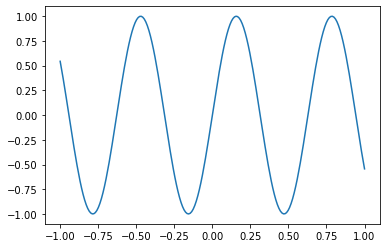

In [21]:
x = np.linspace(-1, 1, 200)[:, None]
y = np.sin(10*x).squeeze()
plt.plot(x,y)

Try to fit the MLP with all default parameters. Are you satisfied with the result?

In [22]:
# your code here

There are several things we can do to get a better fit. Let's go through the options one by one. Let's focus first on the hyper-parameters we know.

- What is the default activation. Do you see an improvement if you revert it to the smooth functions we have see so far?

In [23]:
# your code here

- Try to increase/decrease the number of hidden layers

In [24]:
# your code here

As you can see in the documentation, the choice of solver can make a big difference. DO you confirm this is the case for your dataset?

In [25]:
# your code here

With all these options, you should be able to find a very small neural network that fits your data better than the default options. What is your minimal neural network?

In [26]:
# your code here

## Neural network for classification

Neural networks are also used for classification

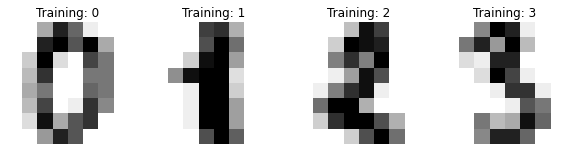

In [27]:
# degraded version of the original MNIST data set
from sklearn import datasets
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

Use this data set to train a neural network to recognize hand writen digits. Look at the [Documention](https://scikit-learn.org/stable/modules/neural_networks_supervised.html) to get help

## References

- https://github.com/MorvanZhou/simple-neural-networks
- https://www.manning.com/books/deep-learning-with-python-second-edition
- http://neuralnetworksanddeeplearning.com/

***
## Credit

[//]: # "This notebook is part of [E4C Interdisciplinary Center - Education](https://gitlab.in2p3.fr/energy4climate/public/education)."
Contributors include Bruno Deremble and Alexis Tantet.

<br>

<div style="display: flex; height: 70px">
    
<img alt="Logo LMD" src="images/logos/logo_lmd.jpg" style="display: inline-block"/>

<img alt="Logo IPSL" src="images/logos/logo_ipsl.png" style="display: inline-block"/>

<img alt="Logo E4C" src="images/logos/logo_e4c_final.png" style="display: inline-block"/>

<img alt="Logo EP" src="images/logos/logo_ep.png" style="display: inline-block"/>

<img alt="Logo SU" src="images/logos/logo_su.png" style="display: inline-block"/>

<img alt="Logo ENS" src="images/logos/logo_ens.jpg" style="display: inline-block"/>

<img alt="Logo CNRS" src="images/logos/logo_cnrs.png" style="display: inline-block"/>
    
</div>

<hr>

<div style="display: flex">
    <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0; margin-right: 10px" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a>
    <br>This work is licensed under a &nbsp; <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.
</div>